# Problem Statement
#### Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. In a datawarehouse, these data stores hold a significant amount of consumer information and particular item details. By mining the data store from the data warehouse, more anomalies and common patterns can be discovered.

# Approach: 
#### The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing.This model is built on the basis of the Linear Regression.


### Data understanding |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


### variable explaination


1.)Item_Identifier: Unique product ID2
2.)Item_Weight: Weight of product
3.)Item_Fat_Content: Whether the product is low fat or not
4.)Item_Visibility: The % of total display area of all products in a store allocated to theparticular product5.)
5.)Item_Type: The category to which the product belongs
6.)Item_MRP: Maximum Retail Price (list price) of the product
7.)Outlet_Identifier: Unique store ID
8.)Outlet_Establishment_Year: The year in which store was established
9.)Outlet_Size: The size of the store in terms of ground area covered
10.)Outlet_Location_Type: The type of city in which the store is located
11.)Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
12.)Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Here we can see the vairables used in the data set
follwing are the variable explanation

## Data cleaniing

In [7]:
round((df.isnull().sum()*100)/len(df),2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

#### we can treat Item_Weight and Outlet_size

In [8]:
# Treating Item Weigth
df.Item_Weight.value_counts(normalize=True)

12.150    0.012181
17.600    0.011615
13.650    0.010907
11.800    0.010765
15.100    0.009632
            ...   
7.275     0.000283
7.685     0.000142
9.420     0.000142
6.520     0.000142
5.400     0.000142
Name: Item_Weight, Length: 415, dtype: float64

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True )

In [10]:
round((df.isnull().sum()*100)/len(df),2)

Item_Identifier               0.00
Item_Weight                   0.00
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [11]:
# Treating Outlet_size
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [12]:
miss_bool = df['Outlet_Size'].isnull() #False=>present , True =>missing
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

df['Outlet_Size'].isnull().sum()

0

In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
# Standarizing the values of the Item_fat_content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [16]:
Item_Visibility

NameError: name 'Item_Visibility' is not defined

In [ ]:
sum(df['Item_Visibility']==0)

In [ ]:
# there are 526 zero Visibility values 
# replacing zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)
sum(df['Item_Visibility']==0)

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
## we can create new_item_type by extracting the data from the Item_identifier.
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [19]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})df['New_Item_Type'].value_counts()

SyntaxError: invalid syntax (1913964337.py, line 1)

In [20]:
# here we can compare the 'New_item_type' column with the non-consumable where it creates the boolean value if the New_Item_type has the non_consumbale value it will return as true else flase
# It sets the 'Item_Fat_Content' column to the value 'Non-Edible' for all the rows that satisfy the condition mentioned in the first part. In other words, for all rows where 'New_Item_Type' is 'Non-Consumable', the 'Item_Fat_Content' column will be updated to 'Non-Edible'.

df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

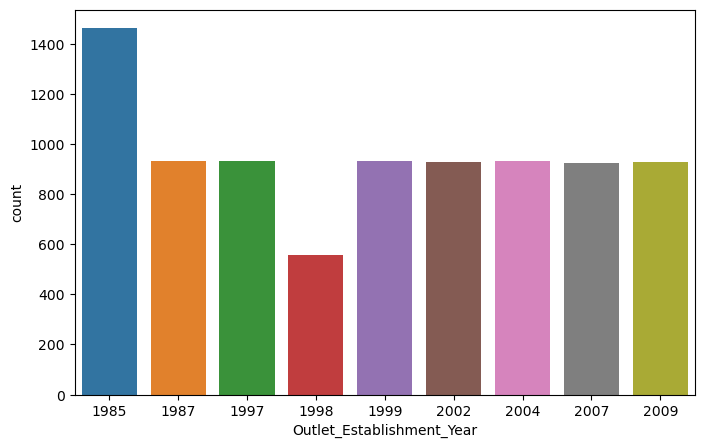

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

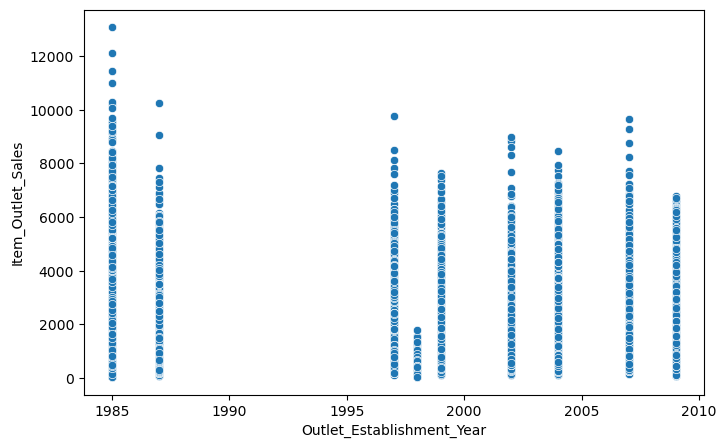

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales', data=df)
plt.show()

In [23]:
df.Item_Outlet_Sales.value_counts(normalize=True)

958.7520     0.001995
1342.2528    0.001877
703.0848     0.001760
1845.5976    0.001760
1278.3360    0.001643
               ...   
4124.6310    0.000117
6622.7126    0.000117
1614.5650    0.000117
5602.7070    0.000117
2778.3834    0.000117
Name: Item_Outlet_Sales, Length: 3493, dtype: float64

<Axes: xlabel='Item_Weight', ylabel='Density'>

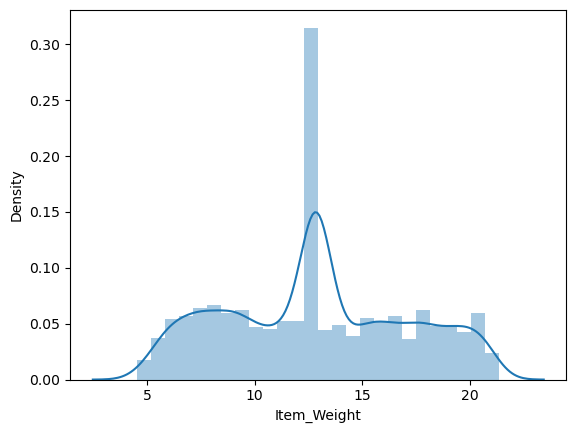

In [24]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

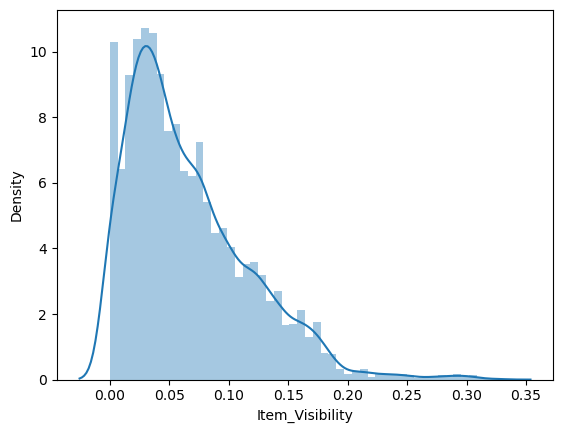

In [25]:
sns.distplot(df['Item_Visibility'])

In [26]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
New_Item_Type                 object
dtype: object

<Axes: xlabel='Item_MRP', ylabel='Density'>

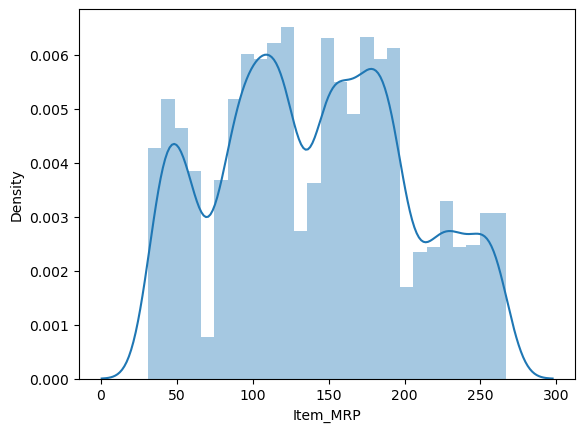

In [27]:
sns.distplot(df['Item_MRP'])

<Axes: xlabel='Item_MRP', ylabel='Item_Visibility'>

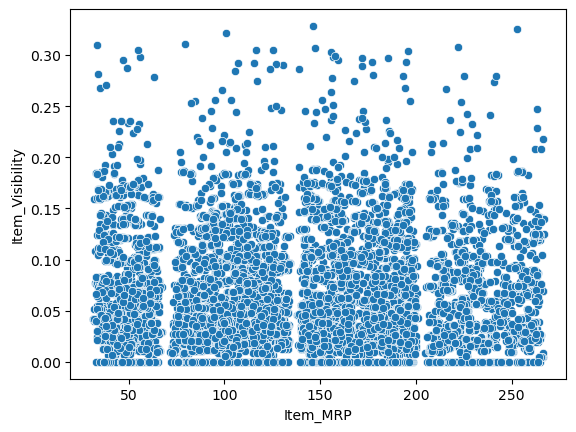

In [28]:
sns.scatterplot(x='Item_MRP',y='Item_Visibility', data=df)

In [29]:
df_numeric=df.select_dtypes(include=['float64'])

In [30]:
df_numeric.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


<Figure size 2000x1000 with 0 Axes>

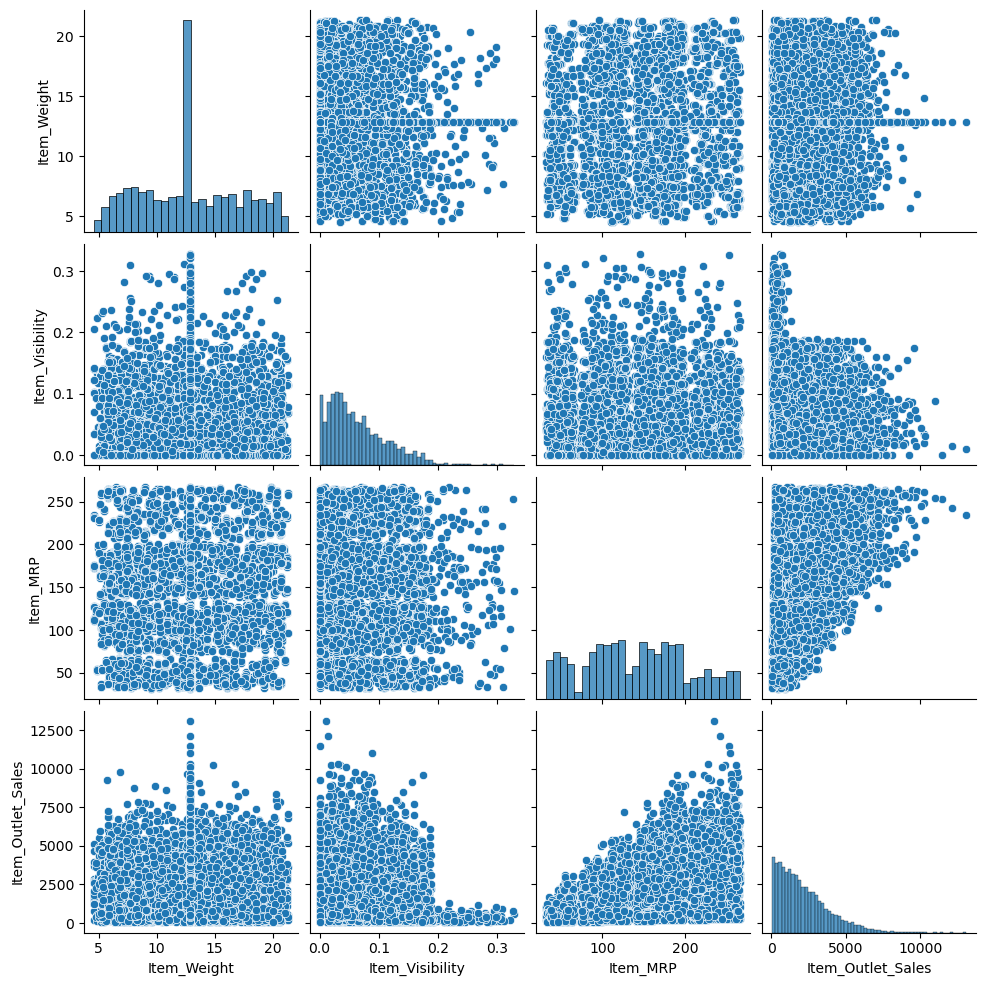

In [31]:
# plotting the pair plot collectively
plt.figure(figsize=(20, 10))
sns.pairplot(df_numeric)
plt.show()

In [32]:
## here we can conclude that items with lower Mrp has low sales and increase gradually with increasing sales.
### similarly the low visibility leads to the high sales.

In [33]:
# dealing with the categorical data 
df_categorical=df.select_dtypes('object')

In [34]:
df_categorical.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,FD
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC


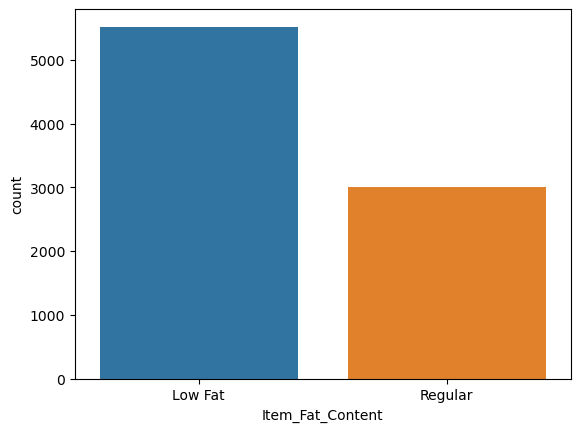

In [35]:
sns.countplot(x= 'Item_Fat_Content', data=df)
plt.show()

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

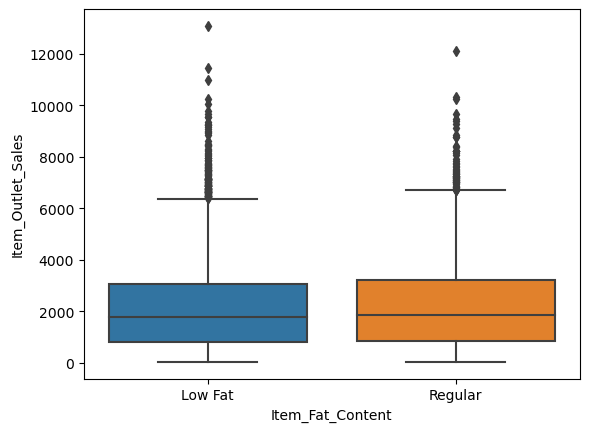

In [36]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_MRP'>

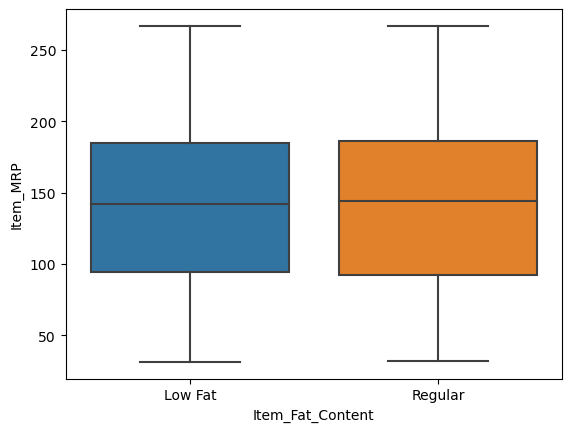

In [37]:
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data=df)

<Axes: xlabel='Item_Type', ylabel='Item_MRP'>

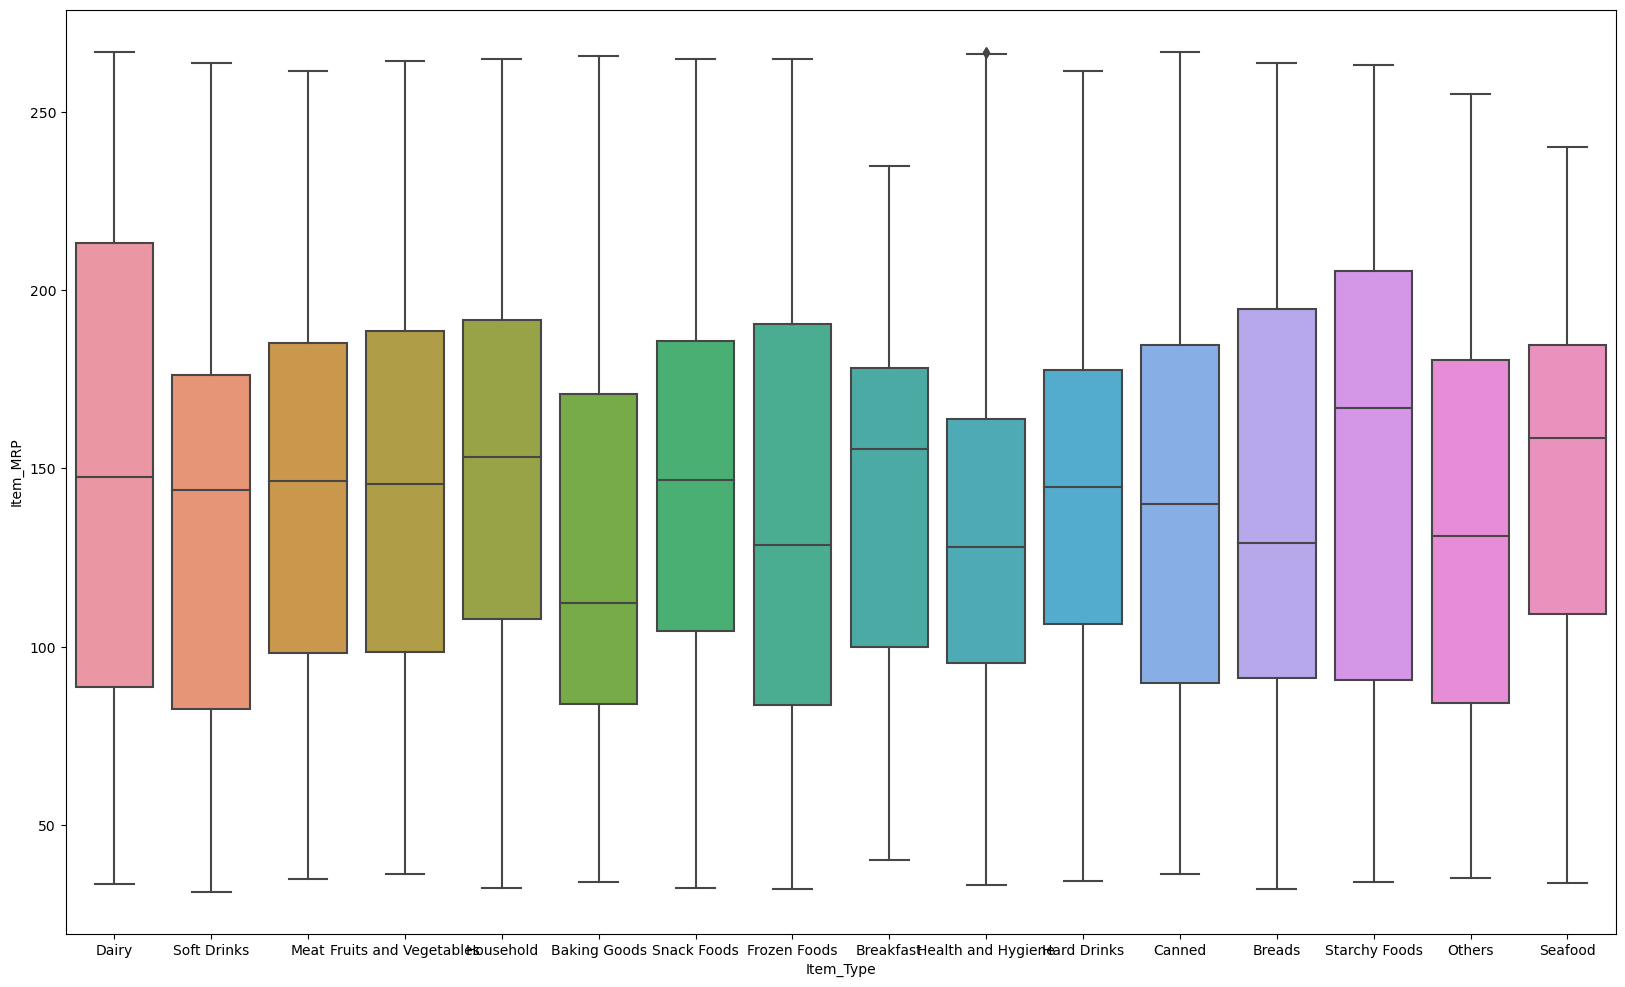

In [38]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Item_Type',y='Item_MRP',data=df)

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

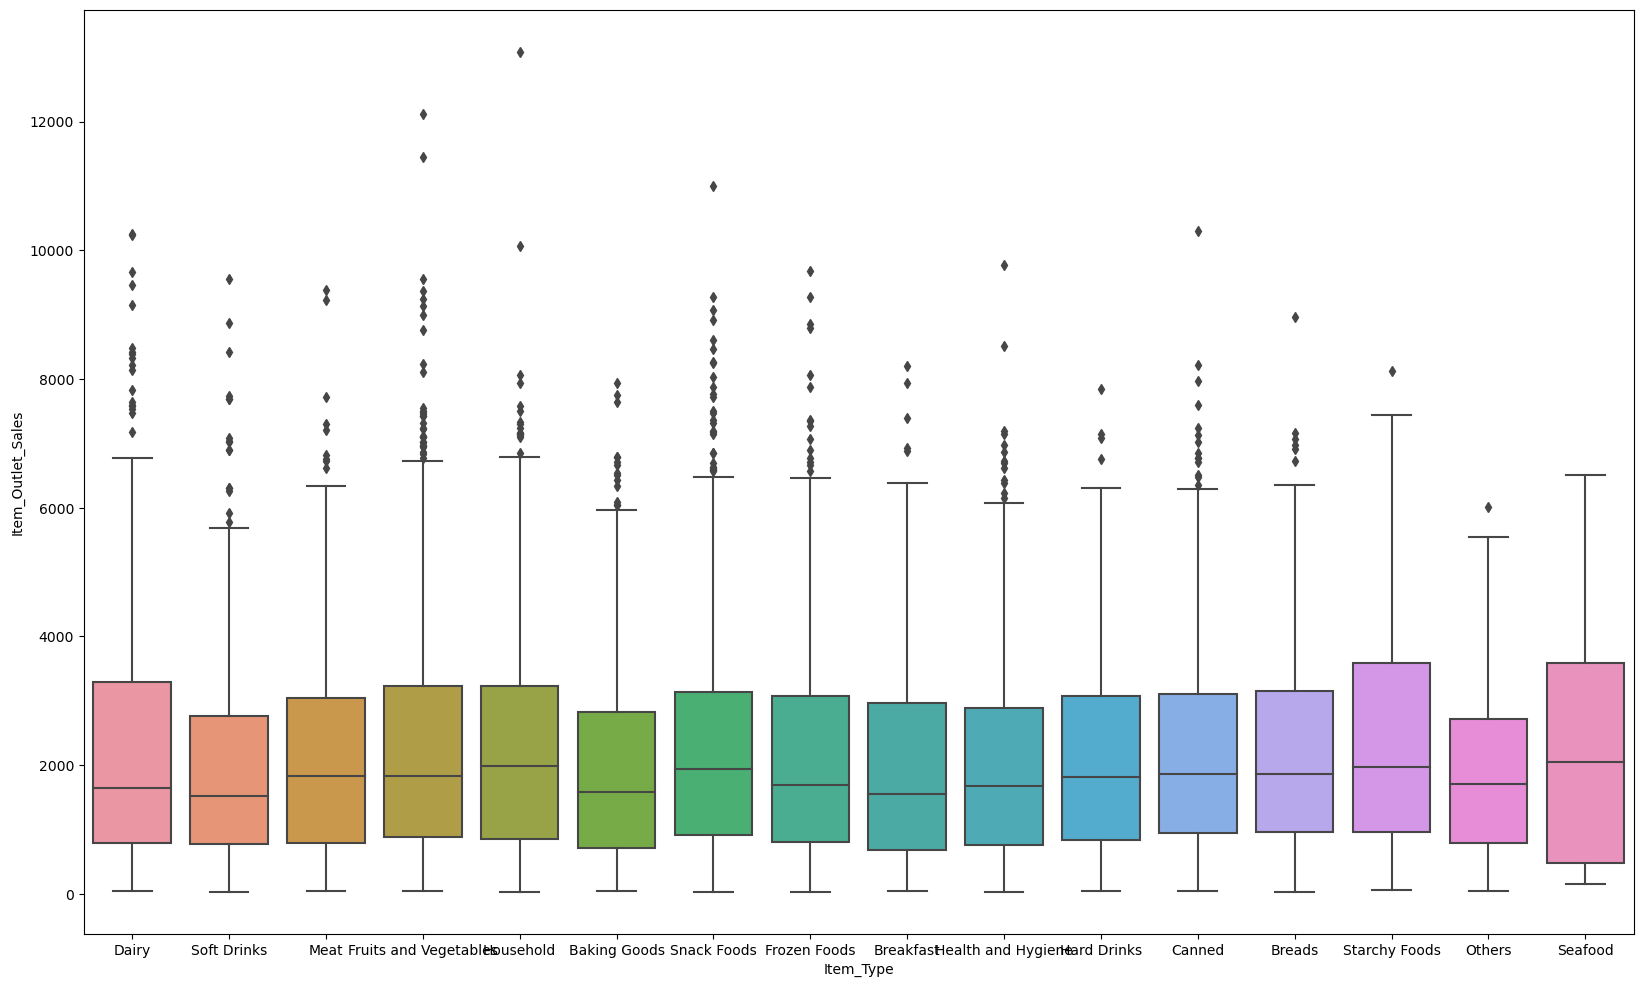

In [39]:
plt.figure(figsize=(20,12))

sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=df)

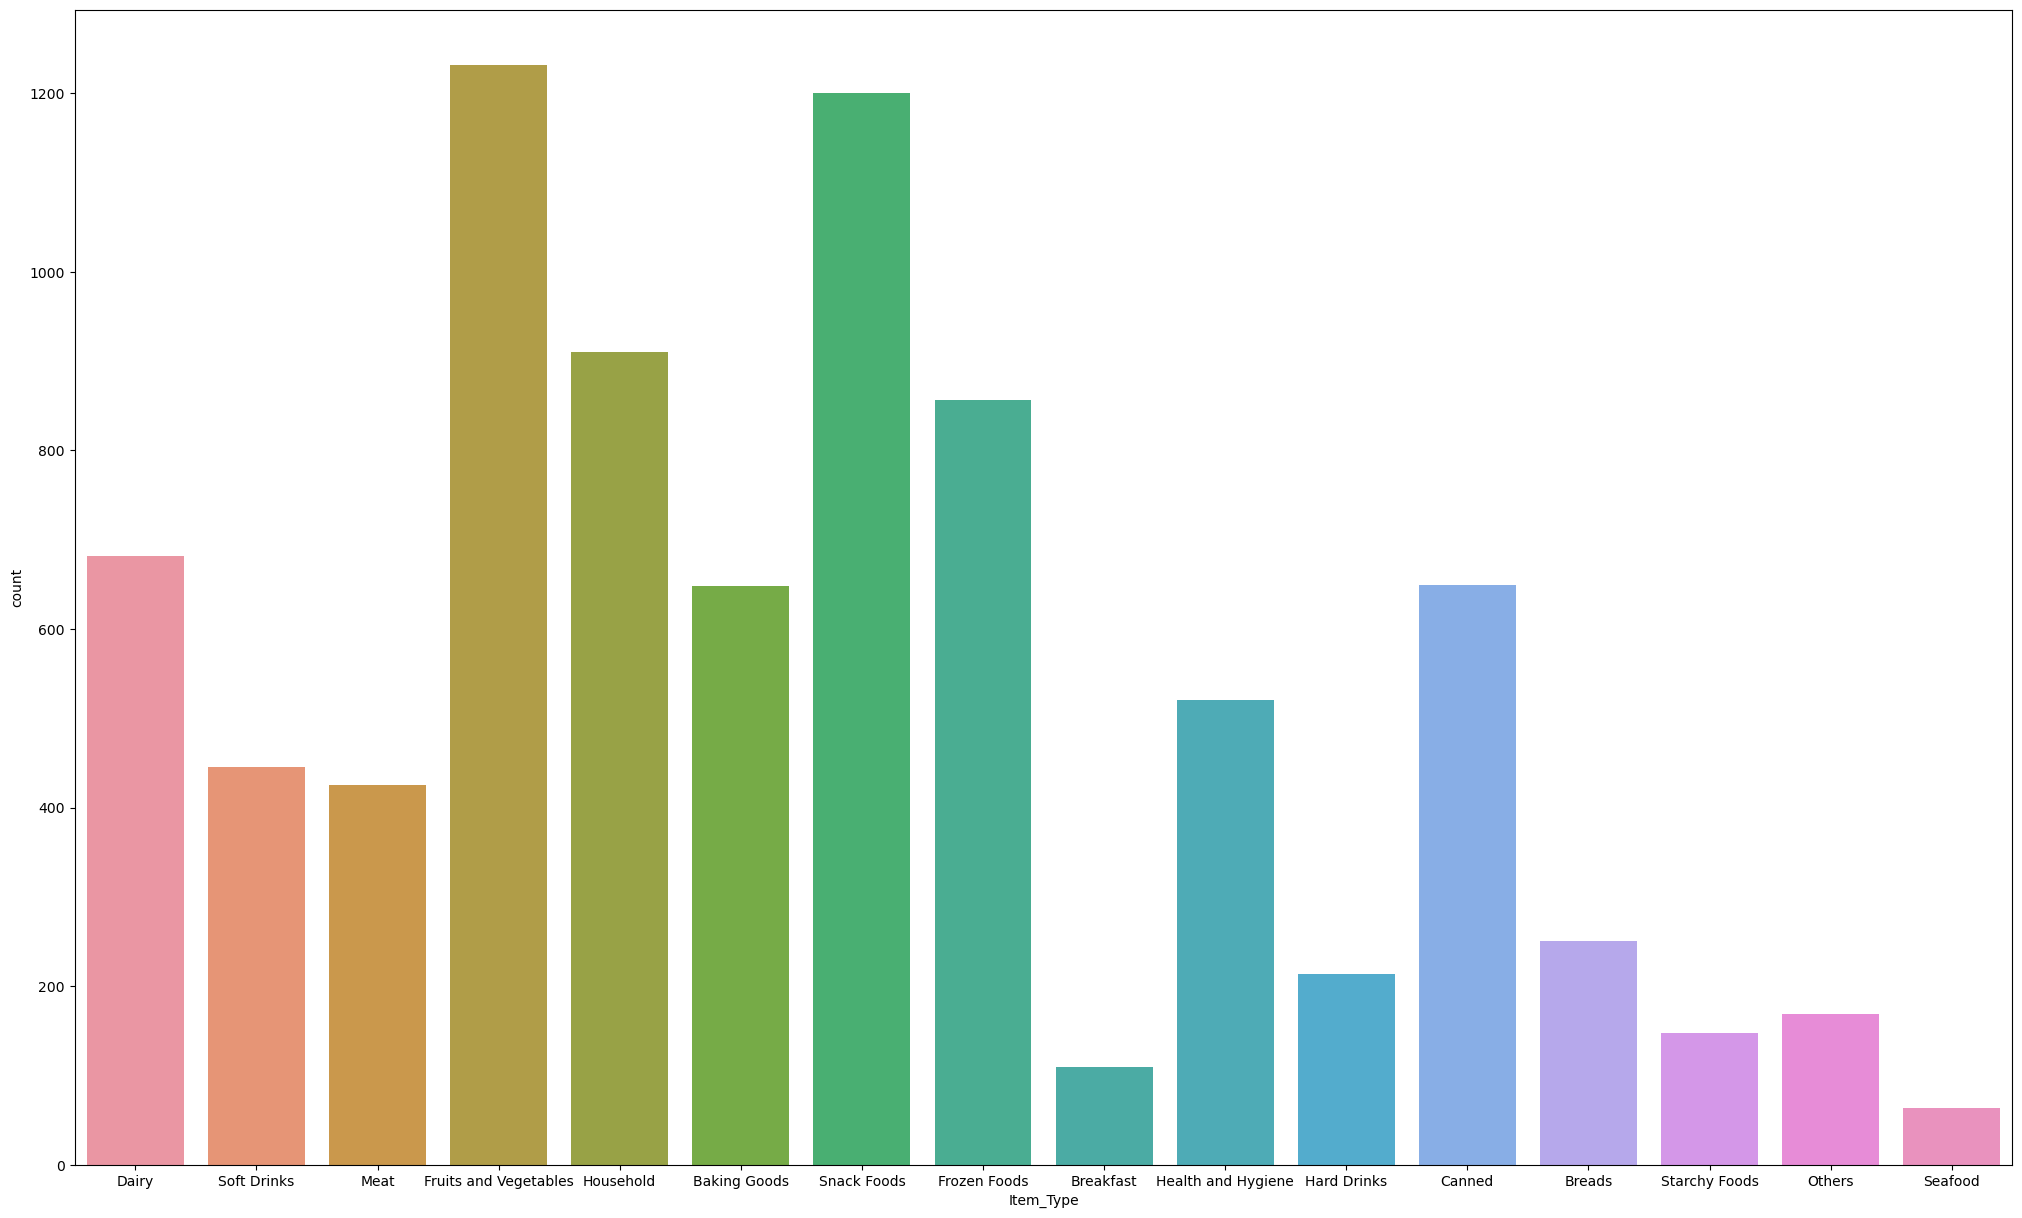

In [40]:
plt.figure(figsize=(25,15))
sns.countplot(x='Item_Type',data=df)
plt.show()

<Axes: xlabel='Outlet_Type', ylabel='count'>

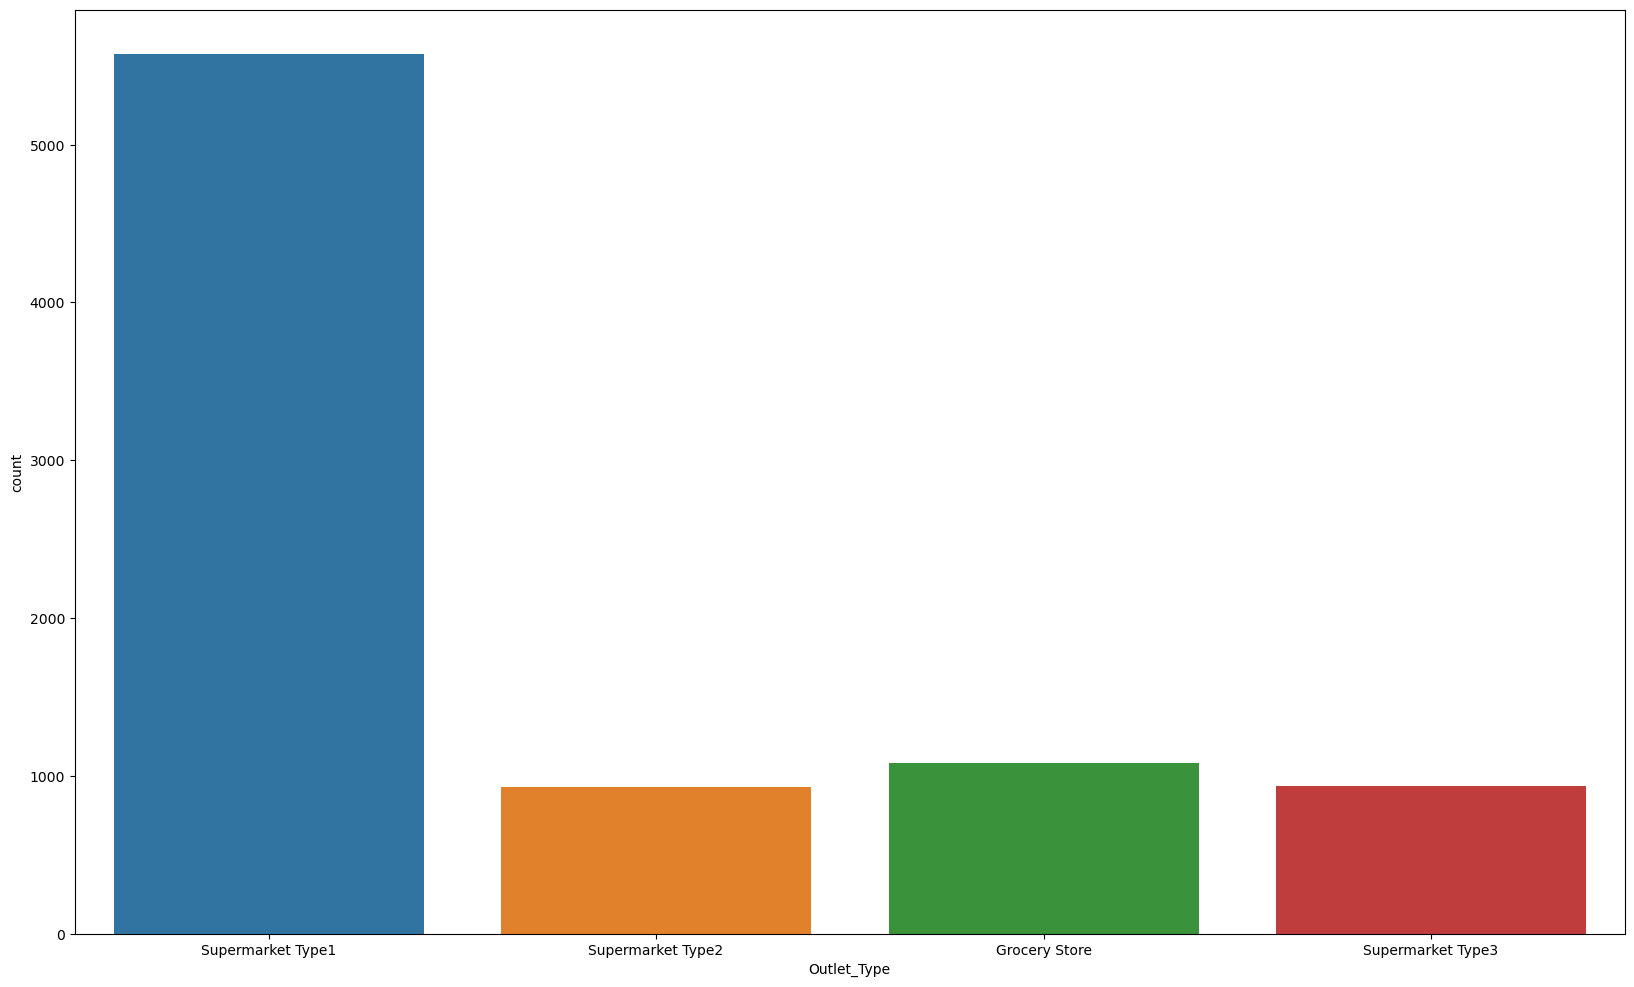

In [41]:
plt.figure(figsize=(20,12))
sns.countplot(x='Outlet_Type',data=df)

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

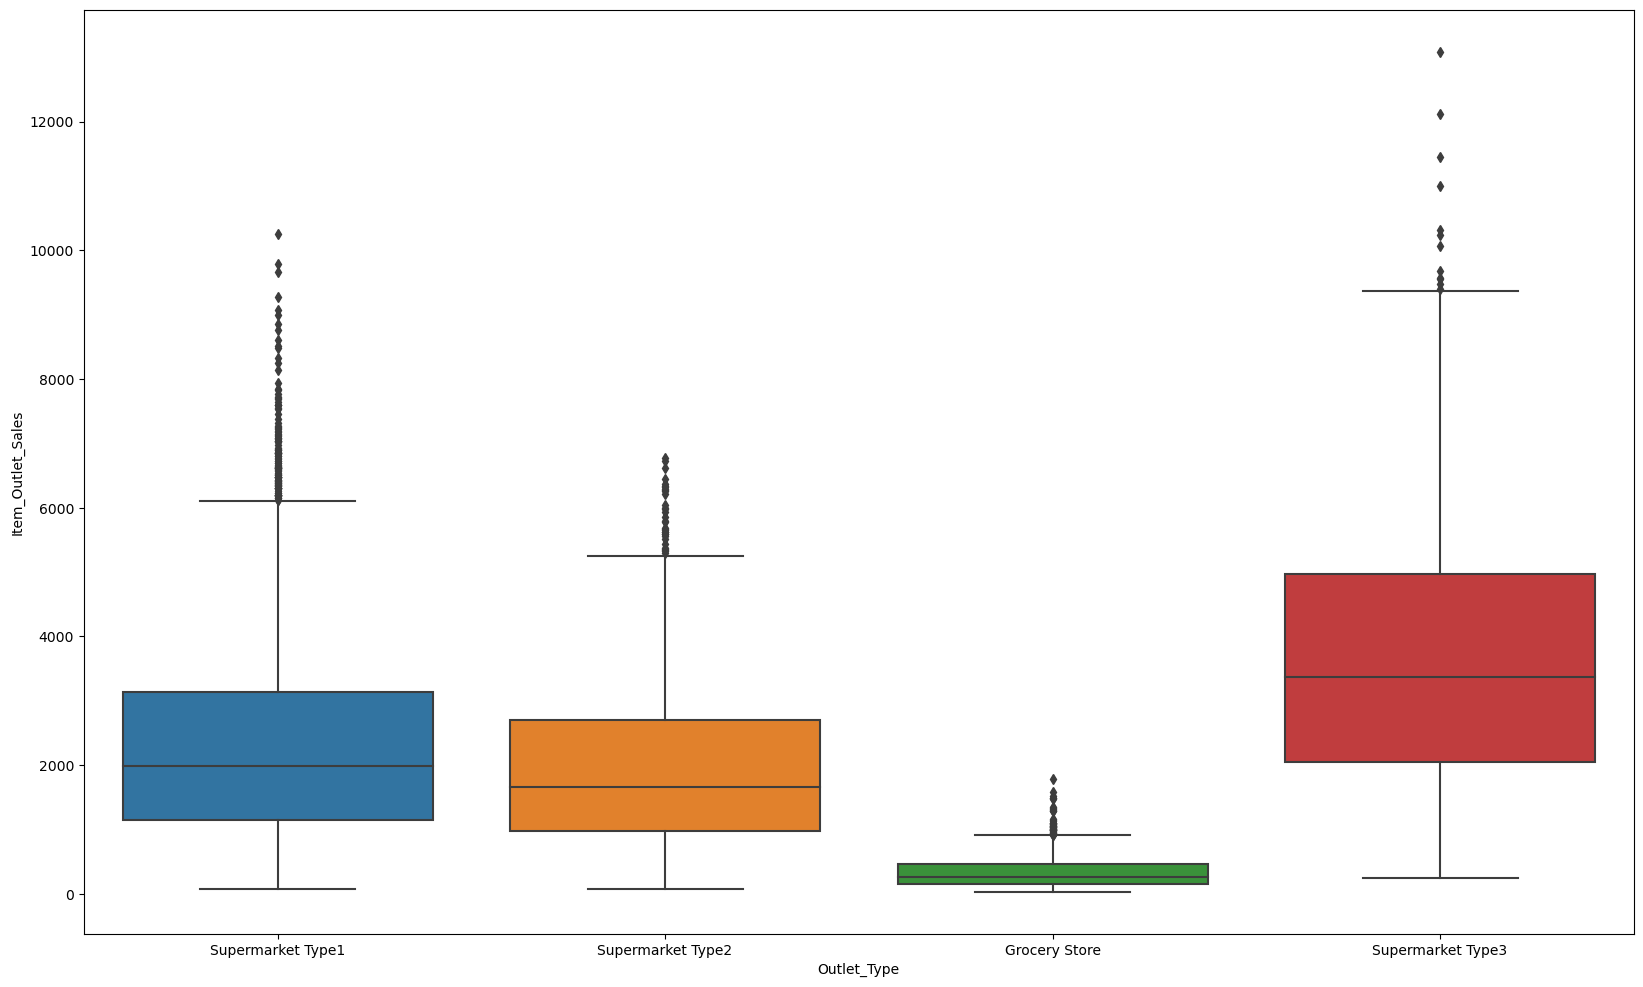

In [42]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

In [43]:
### while having small in number Super market type 3 is performing good in terms of the sales as compared to that of the other supermarket type 
### here the grocery stores performs poor in terms of the sales.

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

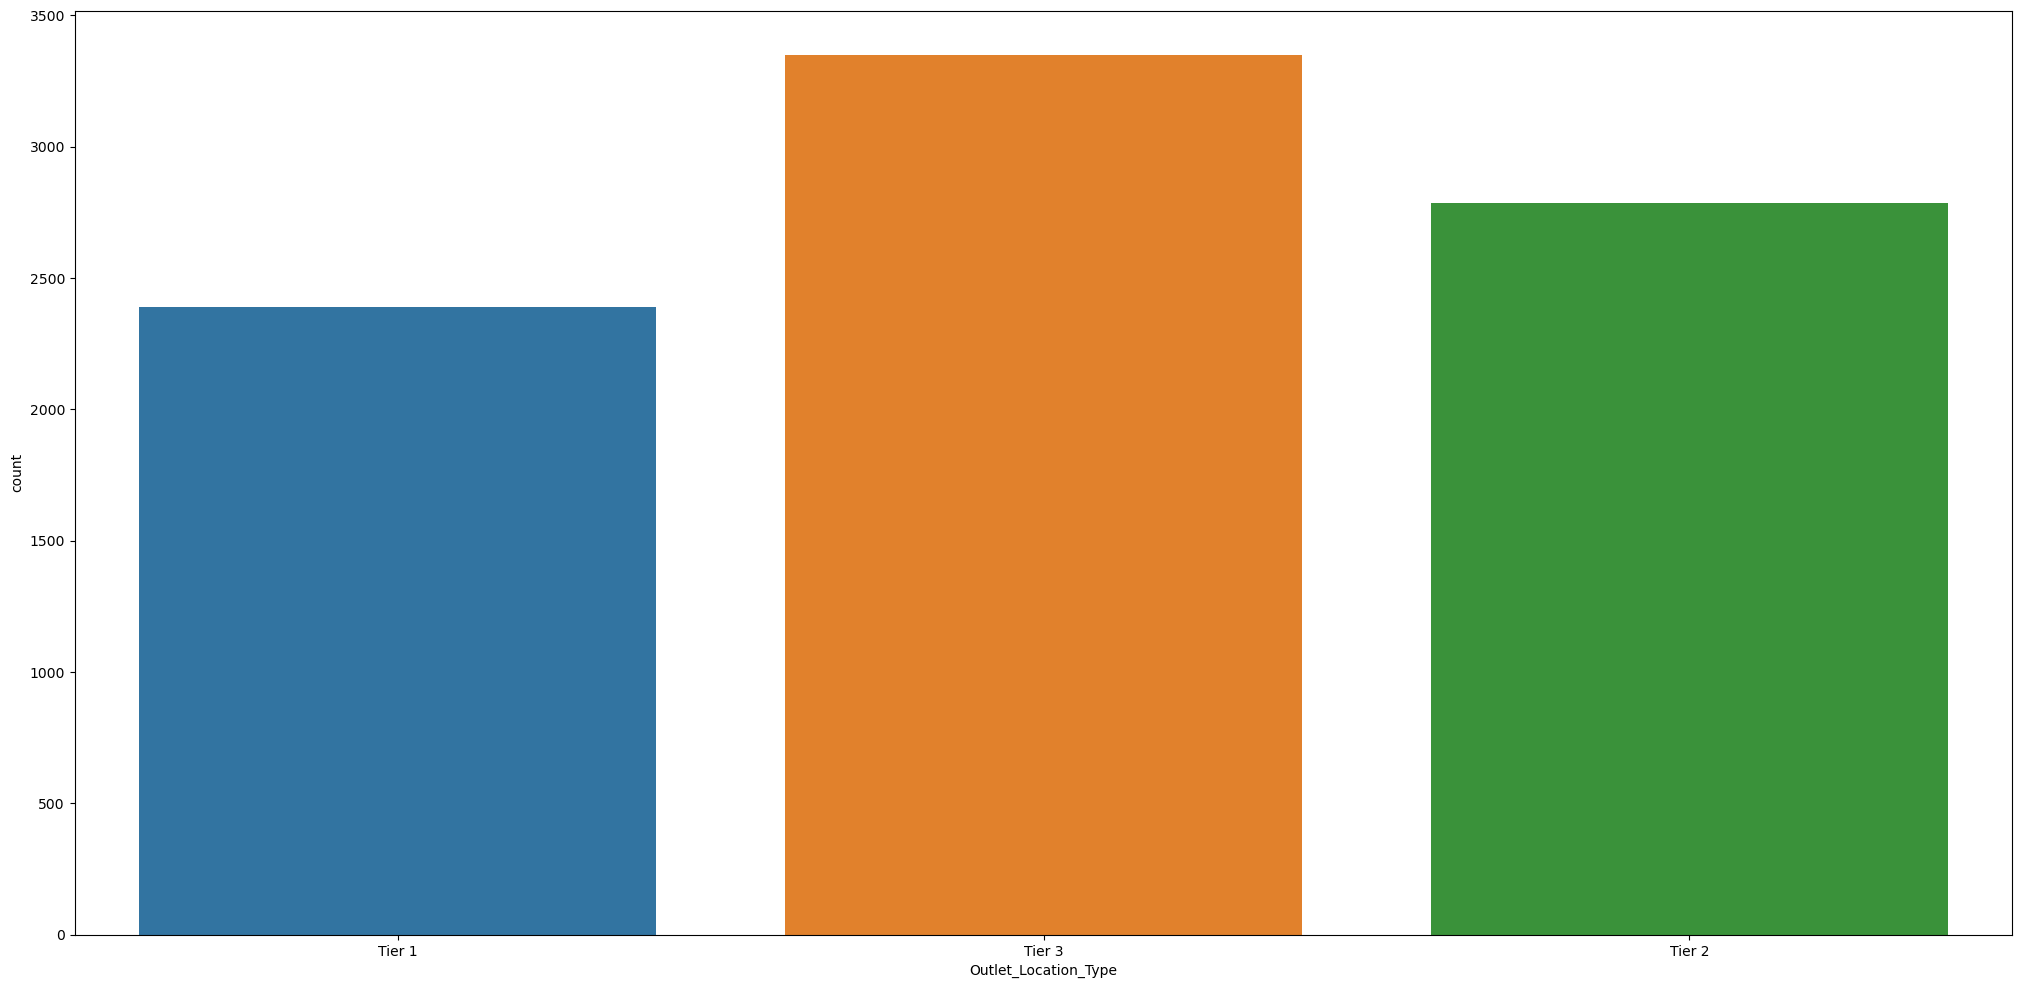

In [44]:
plt.figure(figsize=(25,12))
sns.countplot(x='Outlet_Location_Type',data=df)

In [45]:
## outlets in the tier three cities are more in number as compared to the other tier cities.


<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

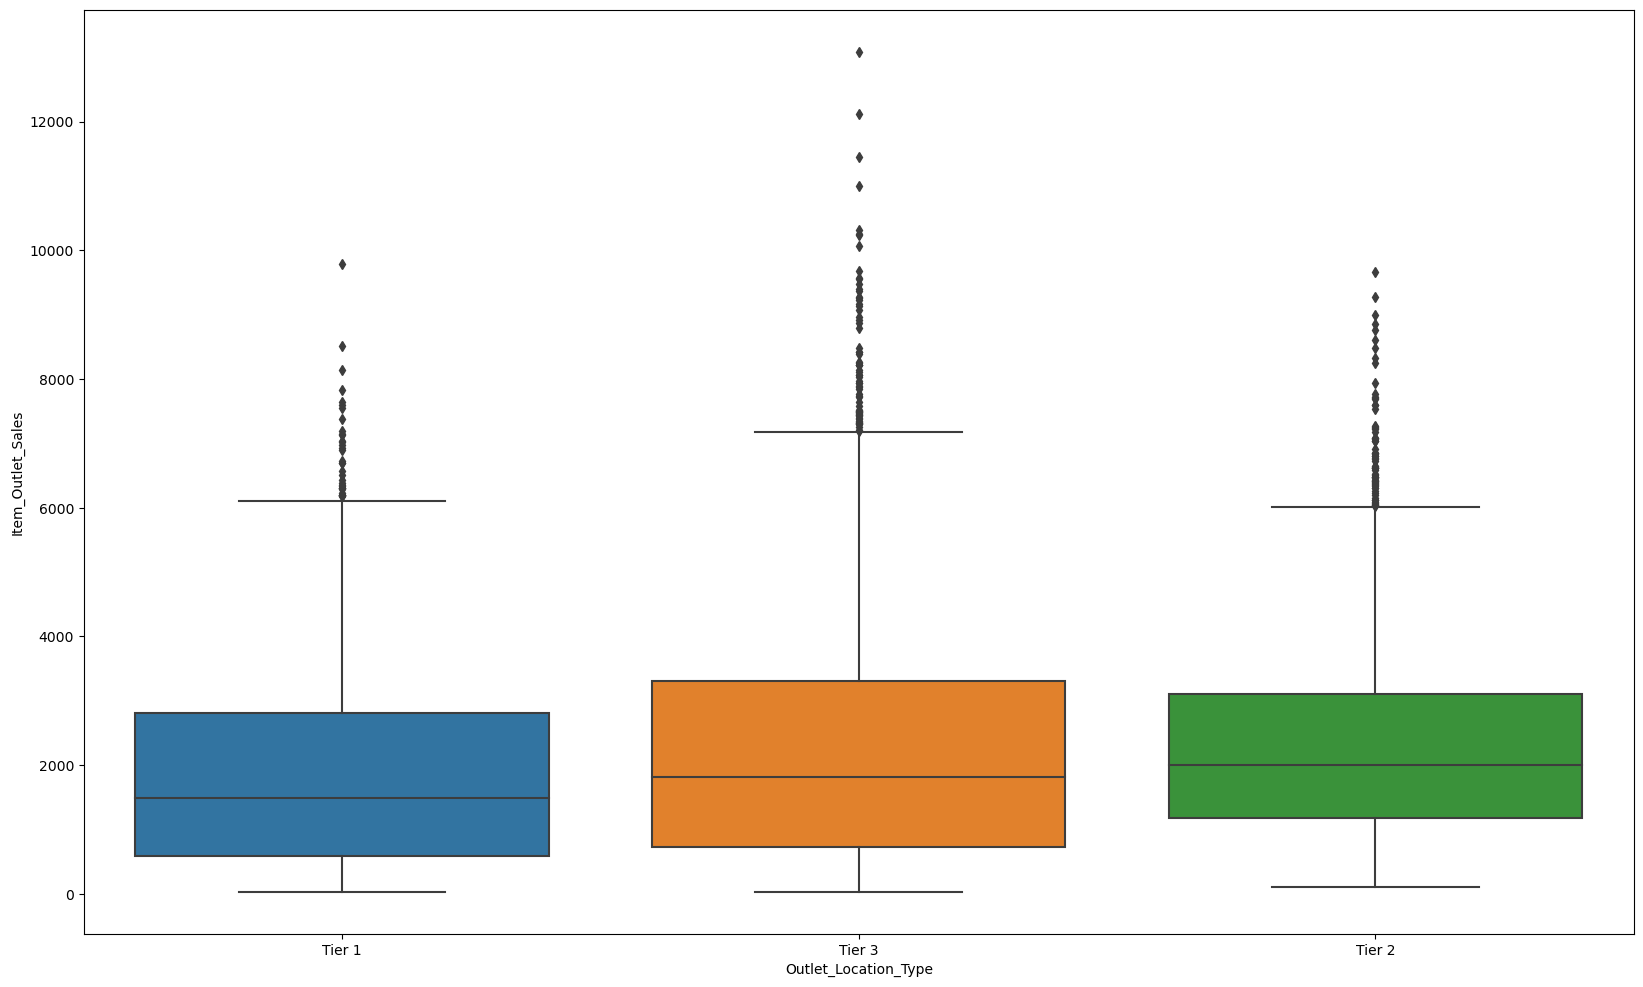

In [46]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

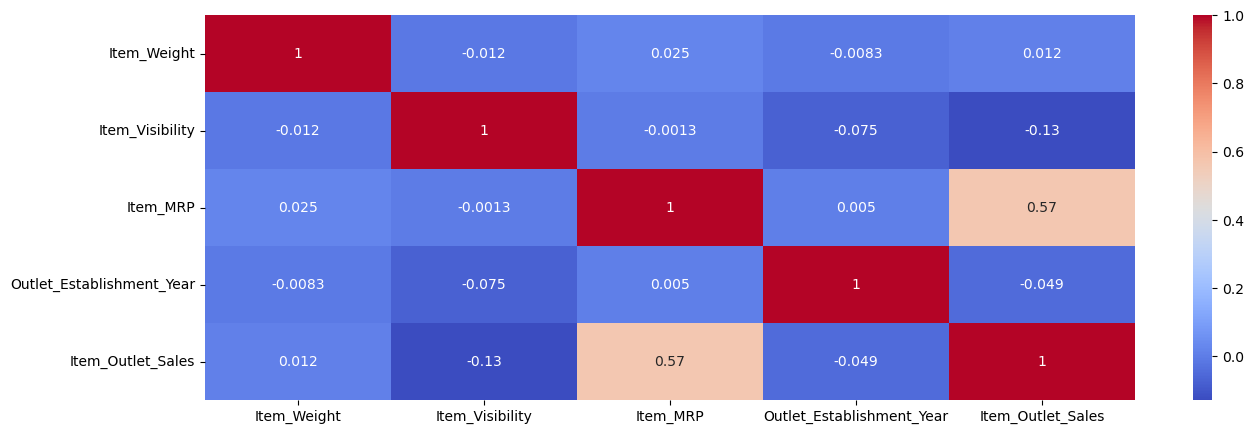

In [47]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [48]:
# here we can see that Item Mrp shows the strong correlation with the Item_oulet_sales.

## data preprocessing

In [49]:
## we can convert categorical data into numerical data 
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])

In [51]:
df_categorical.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
New_Item_Type           object
dtype: object

In [52]:
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']

In [53]:
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [54]:
# one hot encoding
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])

In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,9,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,3,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,9,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,6,182.0950,OUT010,1998,732.3800,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,9,53.8614,OUT013,1987,994.7052,1,1,...,0,0,1,0,1,0,0,0,0,1


In [56]:
X=df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
Y = df['Item_Outlet_Sales']

In [67]:
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df, test_size=0.2, random_state=2)


### Building the Linear model.

In [75]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
7173,11.800000,0.057422,10,149.9366,8,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0
3315,12.857645,0.000000,0,100.1384,5,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
5932,7.725000,0.047783,3,249.1092,8,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
7872,10.500000,0.052555,5,89.6830,8,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
5946,12.857645,0.235859,13,46.1402,4,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0


In [79]:
num_var=['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet']

In [80]:
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [81]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,...,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,0.492250,0.201511,0.481911,0.465643,1997.836316,2167.583480,0.523744,0.650337,0.349663,0.109856,...,0.281461,0.329129,0.389410,0.128043,0.657231,0.106923,0.107803,0.093282,0.718539,0.188178
std,0.252064,0.156769,0.280919,0.264250,8.368979,1693.354404,0.315372,0.476898,0.476898,0.312733,...,0.449745,0.469931,0.487652,0.334163,0.474670,0.309038,0.310154,0.290849,0.449745,0.390883
min,0.000000,0.000000,0.000000,0.000000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.282525,0.082397,0.266667,0.266439,1987.000000,820.265600,0.222222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494352,0.164302,0.400000,0.473264,1999.000000,1789.670400,0.555556,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.681453,0.288365,0.666667,0.655732,2004.000000,3094.638400,0.777778,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2009.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
X_train=df_train.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y_train = df_train['Item_Outlet_Sales']

In [83]:
X_train.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,0.492250,0.201511,0.481911,0.465643,0.523744,0.650337,0.349663,0.109856,0.323115,0.567028,0.281461,0.329129,0.389410,0.128043,0.657231,0.106923,0.107803,0.093282,0.718539,0.188178
std,0.252064,0.156769,0.280919,0.264250,0.315372,0.476898,0.476898,0.312733,0.467701,0.495523,0.449745,0.469931,0.487652,0.334163,0.474670,0.309038,0.310154,0.290849,0.449745,0.390883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.282525,0.082397,0.266667,0.266439,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494352,0.164302,0.400000,0.473264,0.555556,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.681453,0.288365,0.666667,0.655732,0.777778,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:

# Create a LinearRegression model
lm = LinearRegression()

# RFE with 15 features
rfe1 = RFE(estimator=lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [91]:
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True  True False  True  True False False  True  True  True  True  True
  True  True  True  True  True False False  True]
[1 1 6 1 1 3 2 1 1 1 1 1 1 1 1 1 1 5 4 1]


In [93]:
col=X_train.columns[rfe1.support_]

In [94]:
col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'New_Item_Type_2'],
      dtype='object')

In [95]:
col_not_selected=X_train.columns[~rfe1.support_]

In [96]:
col_not_selected

Index(['Item_Type', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'New_Item_Type_0', 'New_Item_Type_1'],
      dtype='object')

In [97]:
X_train_rfe=X_train[col]

In [98]:
import statsmodels.api as sm 

In [101]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     742.7
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:09:45   Log-Likelihood:                -57508.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6805   BIC:                         1.151e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    269

### Checking VIF

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Outlet_Size_0,inf
6,Outlet_Size_1,inf
7,Outlet_Size_2,inf
8,Outlet_Location_Type_0,inf
9,Outlet_Location_Type_1,inf
10,Outlet_Location_Type_2,inf
11,Outlet_Type_0,inf
12,Outlet_Type_1,inf
13,Outlet_Type_2,inf
14,Outlet_Type_3,inf


In [104]:
X_train_rfe.drop('Outlet_Size_0', axis = 1, inplace = True)

In [105]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     742.7
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:18:48   Log-Likelihood:                -57508.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6805   BIC:                         1.151e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    287

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Outlet_Location_Type_0,inf
8,Outlet_Location_Type_1,inf
9,Outlet_Location_Type_2,inf
10,Outlet_Type_0,inf
11,Outlet_Type_1,inf
12,Outlet_Type_2,inf
13,Outlet_Type_3,inf
6,Outlet_Size_2,13.58
5,Outlet_Size_1,13.11
4,Outlet,5.22


In [107]:
X_train_rfe.drop('Outlet_Size_2', axis = 1, inplace = True)

In [108]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     810.3
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:19:52   Log-Likelihood:                -57508.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6806   BIC:                         1.151e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    305

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Outlet_Location_Type_0,inf
7,Outlet_Location_Type_1,inf
8,Outlet_Location_Type_2,inf
9,Outlet_Type_0,inf
10,Outlet_Type_1,inf
11,Outlet_Type_2,inf
12,Outlet_Type_3,inf
4,Outlet,4.67
5,Outlet_Size_1,3.95
2,Item_Visibility,1.09


In [110]:
X_train_rfe.drop('Outlet_Location_Type_2', axis = 1, inplace = True)

In [111]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     810.3
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:21:16   Log-Likelihood:                -57508.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6806   BIC:                         1.151e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    315

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Outlet_Type_0,inf
9,Outlet_Type_1,inf
10,Outlet_Type_2,inf
11,Outlet_Type_3,inf
6,Outlet_Location_Type_0,6.40
4,Outlet,4.67
5,Outlet_Size_1,3.95
7,Outlet_Location_Type_1,3.81
2,Item_Visibility,1.09
12,New_Item_Type_2,1.01


In [113]:
X_train_rfe.drop('Outlet_Type_2', axis = 1, inplace = True)

In [114]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     810.3
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:22:28   Log-Likelihood:                -57508.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6806   BIC:                         1.151e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    258

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.05
9,Outlet_Type_1,6.78
6,Outlet_Location_Type_0,6.40
8,Outlet_Type_0,5.16
4,Outlet,4.67
5,Outlet_Size_1,3.95
7,Outlet_Location_Type_1,3.81
10,Outlet_Type_3,2.01
2,Item_Visibility,1.09
11,New_Item_Type_2,1.01


In [117]:
X_train_trail=X_train_rfe.drop('Item_Visibility', axis = 1,)

In [118]:
X_train_rfe=sm.add_constant(X_train_trail)
lm=sm.OLS(y_train,X_train_trail).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     891.3
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:25:35   Log-Likelihood:                -57509.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6807   BIC:                         1.151e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    242

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train_trail.columns
vif['VIF'] = [variance_inflation_factor(X_train_trail.values, i) for i in range(X_train_trail.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,34.29
8,Outlet_Type_1,6.78
5,Outlet_Location_Type_0,6.40
7,Outlet_Type_0,5.09
3,Outlet,4.67
4,Outlet_Size_1,3.95
6,Outlet_Location_Type_1,3.81
9,Outlet_Type_3,2.01
1,Item_Weight,1.00
2,Item_MRP,1.00


In [120]:
X_train_trail_1=X_train_trail.drop('Item_Weight', axis = 1,)

In [121]:
X_train_rfe=sm.add_constant(X_train_trail_1)
lm=sm.OLS(y_train,X_train_trail_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     990.2
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:28:19   Log-Likelihood:                -57509.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6808   BIC:                         1.151e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    219

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train_trail_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_trail_1.values, i) for i in range(X_train_trail_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.68
7,Outlet_Type_1,6.78
4,Outlet_Location_Type_0,6.40
6,Outlet_Type_0,5.09
2,Outlet,4.67
3,Outlet_Size_1,3.95
5,Outlet_Location_Type_1,3.81
8,Outlet_Type_3,2.01
1,Item_MRP,1.00
9,New_Item_Type_2,1.00


In [125]:
X_train_trail_2=X_train_trail_1.drop('Outlet_Location_Type_0', axis = 1,)

In [126]:
X_train_rfe=sm.add_constant(X_train_trail_2)
lm=sm.OLS(y_train,X_train_trail_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     1113.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:30:23   Log-Likelihood:                -57510.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6809   BIC:                         1.151e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    179

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train_trail_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_trail_2.values, i) for i in range(X_train_trail_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.14
6,Outlet_Type_1,5.89
3,Outlet_Size_1,3.95
5,Outlet_Type_0,3.74
7,Outlet_Type_3,1.87
2,Outlet,1.70
4,Outlet_Location_Type_1,1.69
1,Item_MRP,1.00
8,New_Item_Type_2,1.00


In [128]:
X_train_trail_3=X_train_trail_2.drop('New_Item_Type_2', axis = 1,)

In [129]:
X_train_rfe=sm.add_constant(X_train_trail_3)
lm=sm.OLS(y_train,X_train_trail_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     1272.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:32:28   Log-Likelihood:                -57511.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6810   BIC:                         1.151e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    171

In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train_trail_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_trail_3.values, i) for i in range(X_train_trail_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.86
6,Outlet_Type_1,5.89
3,Outlet_Size_1,3.95
5,Outlet_Type_0,3.74
7,Outlet_Type_3,1.87
2,Outlet,1.70
4,Outlet_Location_Type_1,1.69
1,Item_MRP,1.00


In [131]:
X_train_trail_4=X_train_trail_3.drop('Outlet', axis = 1)


In [132]:
X_train_rfe=sm.add_constant(X_train_trail_4)
lm=sm.OLS(y_train,X_train_trail_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     1484.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:35:03   Log-Likelihood:                -57512.
No. Observations:                6818   AIC:                         1.150e+05
Df Residuals:                    6811   BIC:                         1.151e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    185

In [134]:
vif = pd.DataFrame()
vif['Features'] = X_train_trail_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_trail_4.values, i) for i in range(X_train_trail_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.39
5,Outlet_Type_1,4.19
4,Outlet_Type_0,3.45
2,Outlet_Size_1,3.01
6,Outlet_Type_3,1.79
3,Outlet_Location_Type_1,1.68
1,Item_MRP,1.00


In [136]:
X_train=X_train_trail_4

In [137]:
X_train

,const,Item_MRP,Outlet_Size_1,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3
7173,1.0,0.503175,0,0,0,1,0
3315,1.0,0.291626,1,0,0,0,1
5932,1.0,0.924472,0,0,0,1,0
7872,1.0,0.247211,0,0,0,1,0
5946,1.0,0.062236,0,0,1,0,0
...,...,...,...,...,...,...,...
1099,1.0,0.689704,0,0,0,1,0
2514,1.0,0.821241,0,0,0,1,0
6637,1.0,0.645031,0,1,0,1,0
2575,1.0,0.514354,0,1,0,1,0


### applying it on the test 

In [139]:
df_test[num_var]=scaler.transform(df_test[num_var])

In [140]:
df_test

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
1112,FDI44,0.494352,0.303746,0.400000,0.185825,OUT027,1985,1544.6560,0.555556,1,...,0,0,1,0,0,0,1,0,1,0
1751,FDF41,0.452218,0.400272,0.333333,0.914858,OUT045,2002,6404.9960,0.777778,1,...,0,1,0,0,1,0,0,0,1,0
7648,FDY50,0.074129,0.399589,0.266667,0.239285,OUT045,2002,1070.6064,0.777778,1,...,0,1,0,0,1,0,0,0,1,0
7362,NCN41,0.740994,0.266109,0.533333,0.397552,OUT010,1998,369.5190,0.000000,1,...,0,0,1,1,0,0,0,0,0,1
5332,FDS52,0.494352,0.029188,0.333333,0.301666,OUT019,1985,101.2016,0.444444,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,FDL45,0.494352,0.114209,0.866667,0.402638,OUT027,1985,4255.7936,0.555556,1,...,0,0,1,0,0,0,1,0,1,0
975,FDR20,0.919619,0.085625,0.400000,0.064930,OUT035,2004,1222.4088,0.666667,0,...,0,1,0,0,1,0,0,0,1,0
6190,NCC18,0.866032,0.542867,0.600000,0.598781,OUT017,2007,1551.9798,0.222222,1,...,0,1,0,0,1,0,0,0,0,1
32,FDP33,0.842215,0.000000,0.866667,0.956579,OUT018,2009,3068.0064,0.333333,1,...,0,0,1,0,0,1,0,0,1,0


In [141]:
## dividing into x_test and y_test
X_test=df_test.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y_test = df_test['Item_Outlet_Sales']

In [145]:
X_test_new=sm.add_constant(X_test)


In [146]:
X_test_new_1=X_test_new[X_train.columns]

In [147]:
X_test_new_1

,const,Item_MRP,Outlet_Size_1,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3
1112,1.0,0.185825,1,0,0,0,1
1751,1.0,0.914858,0,1,0,1,0
7648,1.0,0.239285,0,1,0,1,0
7362,1.0,0.397552,0,0,1,0,0
5332,1.0,0.301666,0,0,1,0,0
...,...,...,...,...,...,...,...
3503,1.0,0.402638,1,0,0,0,1
975,1.0,0.064930,0,1,0,1,0
6190,1.0,0.598781,0,1,0,1,0
32,1.0,0.956579,1,0,0,0,0


In [148]:
y_pred=lm.predict(X_test_new_1)

Text(0, 0.5, 'y_pred')

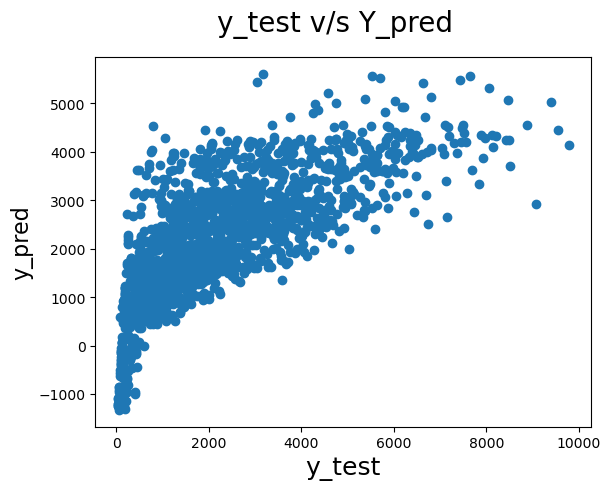

In [151]:
#model evalution
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test v/s Y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

In [152]:
# R2_score for the test variable
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5450508634365134

### Thus, for the model with 6 variables, the r-squared on training and test data is about 56.7% and 54.5% respectively. The adjusted r-squared on the train set is about is about  56.6%.

In [154]:
cols=X_train.columns

In [155]:
cols

Index(['const', 'Item_MRP', 'Outlet_Size_1', 'Outlet_Location_Type_1',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_3'],
      dtype='object')

In [160]:
cols=['Item_MRP', 'Outlet_Size_1', 'Outlet_Location_Type_1',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_3']

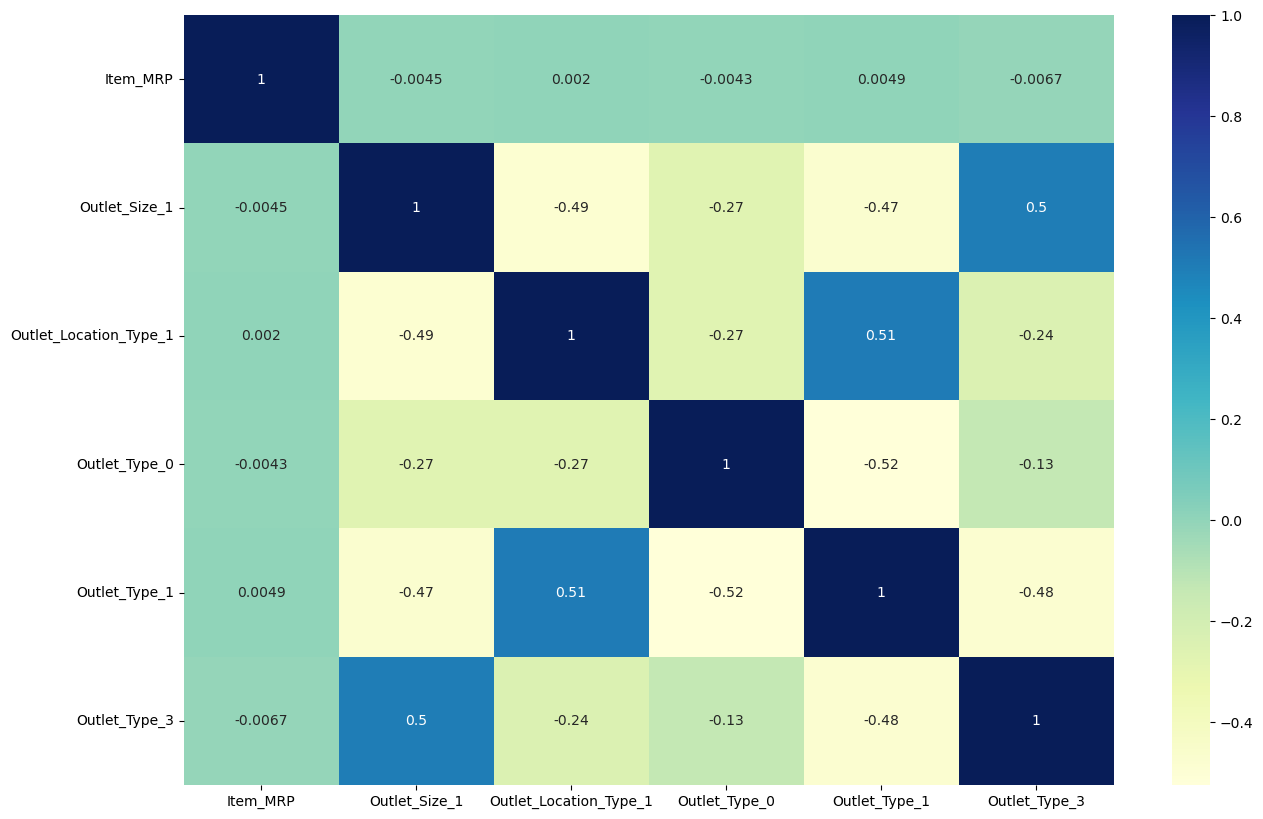

In [162]:
plt.figure(figsize=(15,10))

# Heatmap
sns.heatmap(df[cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

# summary 
By the following analysis and the linearRegression plotting we can predict the sales varibale with the following equation
### sales=3665.06 × Item_MRP + 88.04 × Outlet_Size_1 + 74.47 × Outlet_Location_Type_1 - 1531.97 × Outlet_Type_0 + 359.37 Outlet_Type_1 + 1697.05 × Outlet_Type_3

Following are the varibales that cotributed in predicting the sales of the store
#### 'Item_MRP', 'Outlet_Size_1', 'Outlet_Location_Type_1','Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_3'